## Transfer Learning Mobilenet_V2

In [1]:
# pip install tensorflow-hub

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Model,layers,Sequential 
import tensorflow_hub as hub
import PIL
import pathlib
import cv2
import os

In [3]:
image_size = (224,224)
image_size + (3,)
# this method add the one diamention in image size

(224, 224, 3)

In [4]:
image_size = (224,224)
model = Sequential([
        hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape = image_size + (3,))
])

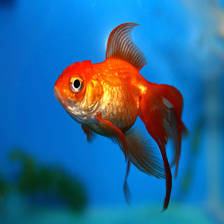

In [5]:
my_fish = PIL.Image.open("DataSets/goldfish.jpg").resize(image_size)
# image from my lap and resize to 224*224
my_fish

In [6]:
# np.array(my_fish)
my_fish = np.array(my_fish)/255
# converted to array and scaling image

In [7]:
my_fish.shape

(224, 224, 3)

In [8]:
my_fish = my_fish.reshape(1,224,224,3)
# Reshape image as a first image in array

In [9]:
m_p = model.predict(my_fish)

In [10]:
np.argmax(m_p)
# 388 class is of goldfish

2

In [11]:
# Here insted of fish image you can use any dataset for prediction in model.predict()
data_path = 'DataSets/CatVsDog'
my_data = pathlib.Path(data_path)

In [12]:
cat_data = list(my_data.glob('cats/*.jpg'))
dog_data = list(my_data.glob('dogs/*.jpg'))

In [13]:
class_data = {
    
    'cat' : list(my_data.glob('cats/*.jpg')),
    'dog' : list(my_data.glob('dogs/*.jpg'))
}

In [14]:
class_label = {
    
    'cat' : 0,
    'dog' : 1
}

In [15]:
X,y = [],[]
for pet_name , images in class_data.items():
    for image in images:
        img = cv2.imread(str(image))
        img_resize = cv2.resize(img,(224,224))
        X.append(img_resize)
        y.append(class_label[pet_name])

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
X_scale = X / 255

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.2)

In [19]:
X_train.shape

(1600, 224, 224, 3)

In [20]:
X_train[1]

array([[[0.52156863, 0.58823529, 0.62352941],
        [0.5254902 , 0.59607843, 0.62352941],
        [0.52156863, 0.59607843, 0.61960784],
        ...,
        [0.50980392, 0.60784314, 0.62352941],
        [0.47058824, 0.55294118, 0.57254902],
        [0.50588235, 0.57254902, 0.58431373]],

       [[0.51372549, 0.57647059, 0.61568627],
        [0.52156863, 0.59215686, 0.61960784],
        [0.5254902 , 0.59607843, 0.62352941],
        ...,
        [0.51372549, 0.61176471, 0.62745098],
        [0.48235294, 0.56862745, 0.58431373],
        [0.49019608, 0.56862745, 0.57647059]],

       [[0.52156863, 0.58823529, 0.62352941],
        [0.52156863, 0.59215686, 0.61960784],
        [0.51372549, 0.58431373, 0.61176471],
        ...,
        [0.49019608, 0.58823529, 0.60392157],
        [0.46666667, 0.56862745, 0.58039216],
        [0.48627451, 0.58039216, 0.58823529]],

       ...,

       [[0.69803922, 0.58823529, 0.54509804],
        [0.69803922, 0.58823529, 0.54509804],
        [0.69803922, 0

In [21]:
feature_extracter_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [22]:
pretrain_model_without_topLayer = Sequential([
        hub.KerasLayer(feature_extracter_model,input_shape = image_size + (3,),trainable = False)
])

In [23]:
number_of_pets = 2

new_model = Sequential([
    
    pretrain_model_without_topLayer,
    layers.Dense(number_of_pets)
    
])
new_model.compile(optimizer = 'adam',loss =  'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [24]:
new_model.fit(X_train,y_train,epochs = 5)
# Compare notebook M with this transfer learning model
# compare number of epochs used to achive maximum accuracy

Epoch 1/5
50/50 [==============================] - 37s 450ms/step - loss: 1.6220 - accuracy: 0.5823
Epoch 2/5
50/50 [==============================] - 22s 450ms/step - loss: 0.4406 - accuracy: 0.6103
Epoch 3/5
50/50 [==============================] - 23s 456ms/step - loss: 0.4248 - accuracy: 0.7328
Epoch 4/5
50/50 [==============================] - 22s 450ms/step - loss: 0.2020 - accuracy: 0.9652
Epoch 5/5
50/50 [==============================] - 23s 453ms/step - loss: 0.4109 - accuracy: 0.9715


In [25]:
new_model.evaluate(X_test,y_test)
# Compare model test accuracy with notebook m

13/13 [==============================] - 7s 432ms/step - loss: 0.6396 - accuracy: 0.9651


[0.6395623683929443, 0.9650872945785522]

In [26]:
y_p = new_model.predict(X_test)
predicted = []
for i in range(len(y_p)):
    predicted.append(np.argmax(y_p[i]))

In [27]:
truth = y_test

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(truth,predicted)
print(classification_report(truth,predicted))
# compare accuracy and f1-score with notebook m

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       214
           1       0.98      0.94      0.96       187

    accuracy                           0.97       401
   macro avg       0.97      0.96      0.96       401
weighted avg       0.97      0.97      0.97       401



<AxesSubplot:>

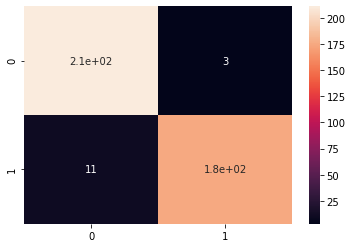

In [29]:
import seaborn as sn
sn.heatmap(cm,annot=True)